In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read a comma-separated values (csv) file into DataFrame.

In [ ]:
df=pd.read_csv('/content/owid-co2-data.csv')
df.shape

(25989, 60)

Cleaning Dataset by droping all the rows with missing values and exporting it to a csv file

In [ ]:
data=df.dropna()
print(data.shape)
data.to_csv('/content/row_cleaned.csv')

(1128, 60)


Checking for the duplicate records

In [ ]:
data=data.drop_duplicates()  #this will remove the duplicate rows.
print(data.shape)

(1128, 60)


finding relations b/w attributes which might be representing same feature

In [ ]:
corr = df["co2"].corr(df["co2_per_capita"])
print(corr)
corr = df["cement_co2"].corr(df["cement_co2_per_capita"])
print(corr)
corr = df["coal_co2"].corr(df["coal_co2_per_capita"])
print(corr)
corr = df["flaring_co2"].corr(df["flaring_co2_per_capita"])
print(corr)
corr = df["gas_co2"].corr(df["gas_co2_per_capita"])
print(corr)
corr = df["oil_co2"].corr(df["oil_co2_per_capita"])
print(corr)
print()
corr = df["co2"].corr(df["trade_co2"])
print(corr)
corr = df["cement_co2"].corr(df["coal_co2"])
print(corr)
corr = df["coal_co2"].corr(df["flaring_co2"])
print(corr)
corr = df["flaring_co2"].corr(df["gas_co2"])
print(corr)
corr = df["gas_co2"].corr(df["oil_co2"])
print(corr)
corr = df["oil_co2"].corr(df["co2"])
print(corr)

0.04088391512887458
0.10561008663380768
0.17763565126806652
-0.011810316891919014
0.048774792450223
0.0077468213343450405

-0.1178981688200401
0.9004057861243785
0.8103304380618933
0.8133647901790066
0.9425673171941842
0.9673149190223551


From here we can infer that attributes like (co2,co2_per_capita),(cement_co2,cement_co2_per_capita), (coal_co2, coal_co2_per_capita), etc. are not highly corelated whereas attributes like (co2, oil_co2), (gas_co2, oil_co2),(cement_co2,coal_co2), etc. are highly corelated to each other.

**Analyzing the Co2 emissions data country wise**

In [ ]:
gr=data.groupby('country', sort=True)
gr.first()

,iso_code,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,,,,,,,,,,,
Australia,AUS,1990,279.365,16.471,-33.458,3.478,0.205,142.497,8.402,7.304,...,29.705,158.28,9.332,79.73,4.701,1.696060e+07,4.641370e+11,1030.075,60733.383,2.219
Austria,AUT,1990,62.140,8.045,25.849,2.033,0.263,18.139,2.348,0.102,...,9.873,11.57,1.498,4.90,0.634,7.723954e+06,2.079790e+11,329.047,42600.913,1.582
Belarus,BLR,1990,103.758,10.221,-43.648,1.188,0.117,8.165,0.804,0.001,...,13.541,20.10,1.980,17.53,1.727,1.015114e+07,1.169750e+11,444.569,43794.982,3.801
Belgium,BEL,1990,120.308,12.023,34.099,2.824,0.282,41.394,4.137,0.085,...,13.064,13.23,1.322,8.16,0.815,1.000654e+07,2.732790e+11,618.635,61823.013,2.264
Brazil,BRA,1990,218.658,1.468,26.549,11.062,0.074,37.095,0.249,7.554,...,3.986,290.79,1.952,110.91,0.744,1.490032e+08,1.185480e+12,1488.863,9992.155,1.256
Bulgaria,BGR,1990,76.699,8.675,-15.427,2.142,0.242,34.726,3.928,0.125,...,11.123,16.39,1.854,8.39,0.949,8.841466e+06,7.935252e+10,323.224,36557.761,4.073
Canada,CAN,1990,458.007,16.630,27.557,5.823,0.211,99.152,3.600,11.710,...,20.327,87.75,3.186,42.92,1.558,2.754132e+07,8.359970e+11,2949.625,107098.148,3.528
Croatia,HRV,1990,22.978,4.811,-1.939,1.093,0.229,2.982,0.624,0.583,...,6.007,4.12,0.863,3.01,0.630,4.776370e+06,5.837408e+10,99.771,20888.506,1.709
Czechia,CZE,1990,164.203,15.879,-13.362,2.489,0.241,123.280,11.922,0.458,...,17.633,23.91,2.312,8.15,0.788,1.034088e+07,1.461680e+11,545.784,52779.293,3.734


In [ ]:
Aus=gr.get_group('Australia')

In [ ]:
mean=Aus.mean() #average of all features
print(mean)

year                                   2.004000e+03
co2                                    3.644092e+02
co2_per_capita                         1.782972e+01
trade_co2                             -3.264045e+01
cement_co2                             3.430931e+00
cement_co2_per_capita                  1.704138e-01
coal_co2                               1.803372e+02
coal_co2_per_capita                    8.891862e+00
flaring_co2                            8.425310e+00
flaring_co2_per_capita                 4.084138e-01
gas_co2                                5.451928e+01
gas_co2_per_capita                     2.623448e+00
oil_co2                                1.141537e+02
oil_co2_per_capita                     5.562552e+00
other_industry_co2                     3.542793e+00
other_co2_per_capita                   1.732069e-01
co2_growth_prct                        1.417586e+00
co2_growth_abs                         4.775966e+00
co2_per_gdp                            4.701724e-01
co2_per_unit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
median=Aus.median() #median of all features
print(median)

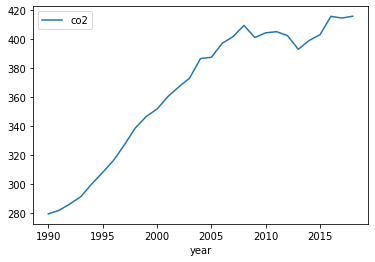

In [ ]:
Aus.plot(x="year", y="co2",kind="line")

**Inference:** Co2 emissions increases linearly between 1990 to 2005 in australia. from 1990 to 2018(28 years) co2 emissions increased from 280 to 420

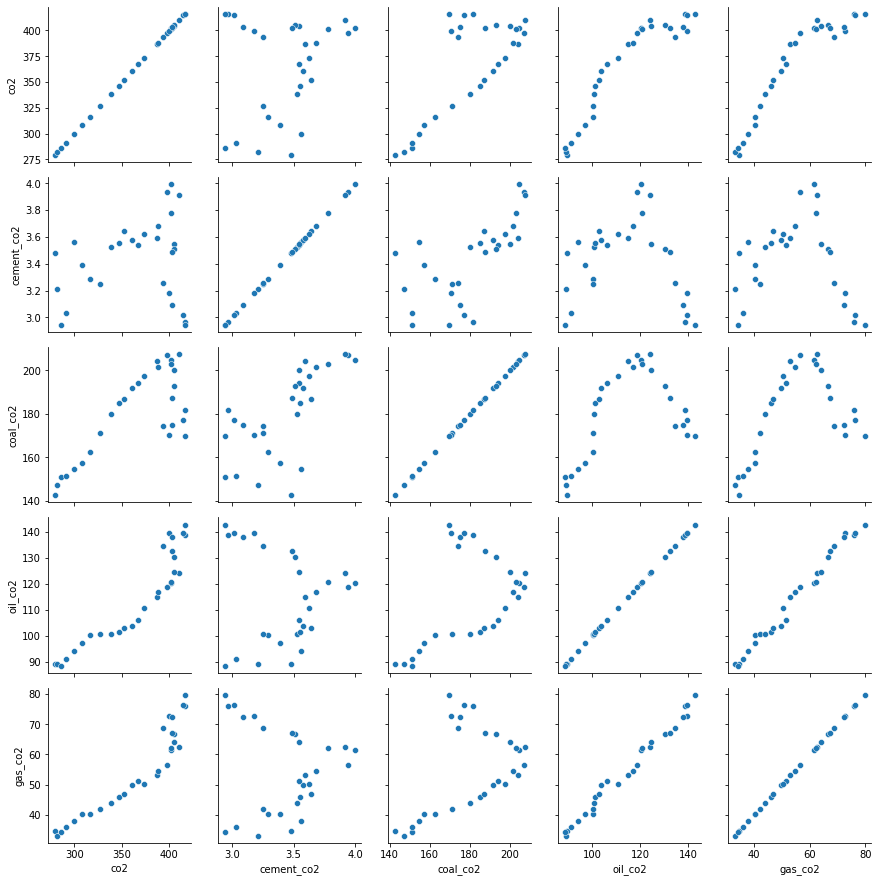

In [ ]:
b=sns.PairGrid(Aus, vars=["co2", "cement_co2","coal_co2","oil_co2","gas_co2"])
b.map(sns.scatterplot)

**Inference:**

1.   cement_co2 is not related to co2, coal_co2, oil_co2, gas_co2
2.   co2 have positive non linear relation with coal_co2, oil_co2, and gas_co2
3.   coal_co2 have positive non linear relation with oil_co2 and gas_co2
4.   oil_co2 and gas_co2 have positive linear relation





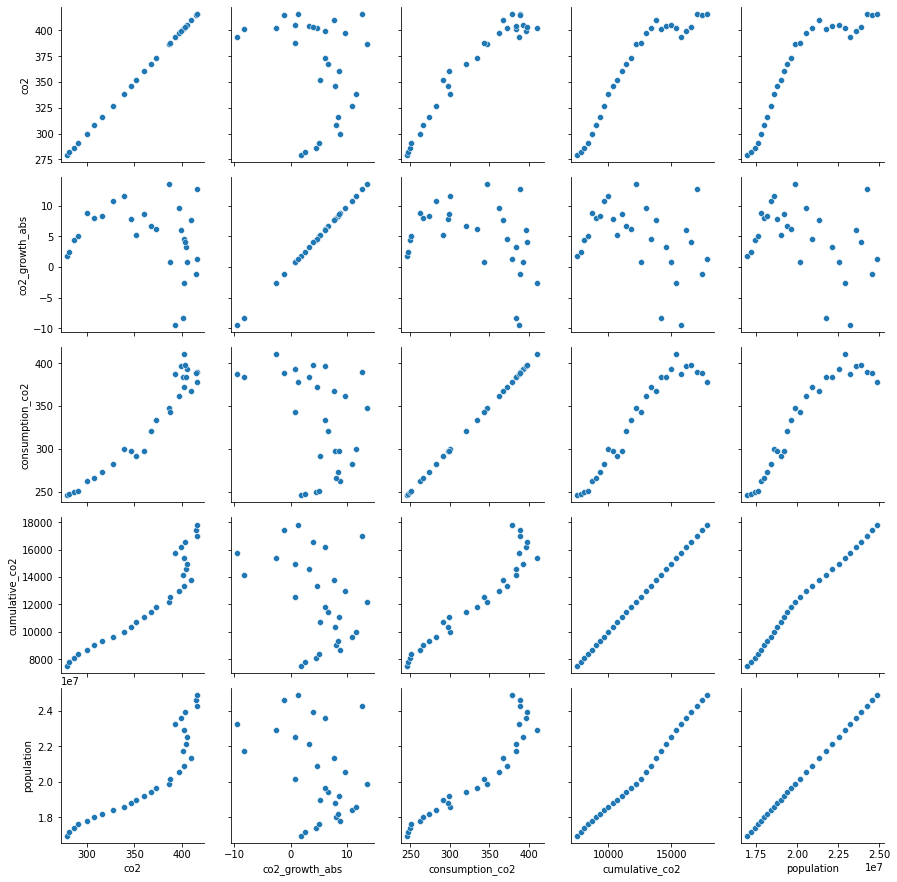

In [ ]:
b=sns.PairGrid(Aus, vars=["co2", "co2_growth_abs","consumption_co2","cumulative_co2","population"])
b.map(sns.scatterplot)

**Inference:**

1.   co2 and population of a country are non linearly related to each other
2.  there is no relation between co2_growth_abs with other 4 attributes
3.  cumulative_co2 is non linearly related with co2,consumption_co2 and linearly related with population.
4.   consuption_co2 is non linarly related with other attributes

In [ ]:
Aust=gr.get_group('Austria')
Bel=gr.get_group('Belarus')
Belg=gr.get_group('Belgium')
Bra=gr.get_group('Brazil')
Bul=gr.get_group('Bulgaria')

country = [Aust,Bel, Belg, Bul]

sample = pd.concat(country)

Taking a sample of 4 countries ["Austria", "Belarus", "Belgium", "Bulgaria"] to observe statistical measures on co2 attribute

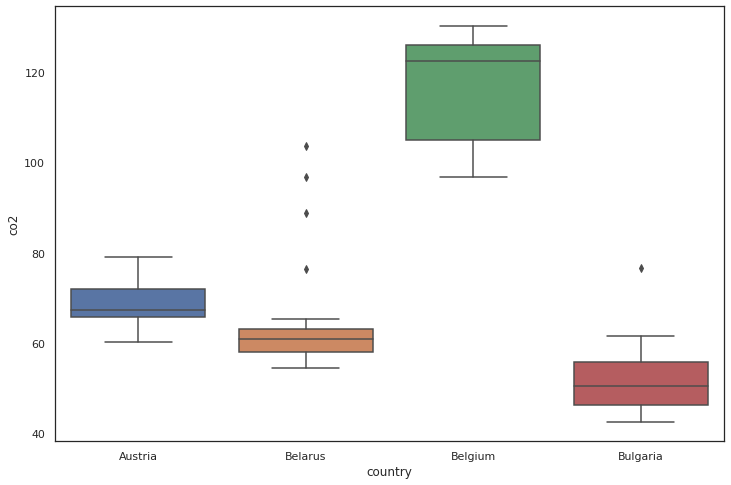

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set(style="white",color_codes=True)
sns.boxplot(x = 'country', y = 'co2', data = sample, ax=ax)
plt.show()

By observing the above box plot we can say that
1. countries Belarus and Bulgaria have outliers.
2. Austria has left skewed normal distribution.
3. Belgium has right skewed normal distribution.





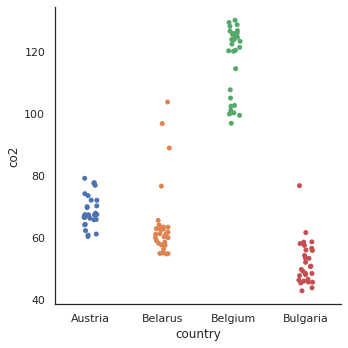

In [ ]:
sns.catplot(x='country',y='co2',data = sample)

Here we can clearly see the outliers in the plot of Belarus and Bulgaria and Belgium has right skewed distribution

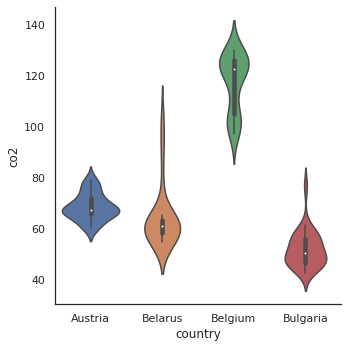

In [ ]:
sns.catplot(x='country',y='co2',kind='violin', data = sample)

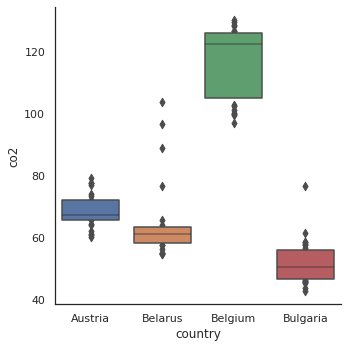

In [ ]:
sns.catplot(x='country',y='co2',kind='boxen', data = sample)

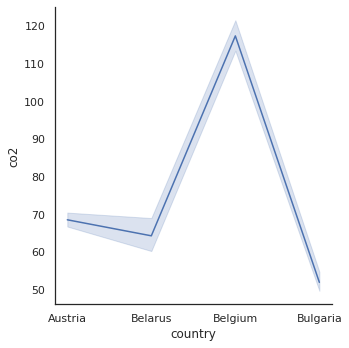

In [ ]:
sns.relplot(x='country',y='co2',data=sample, kind='line')